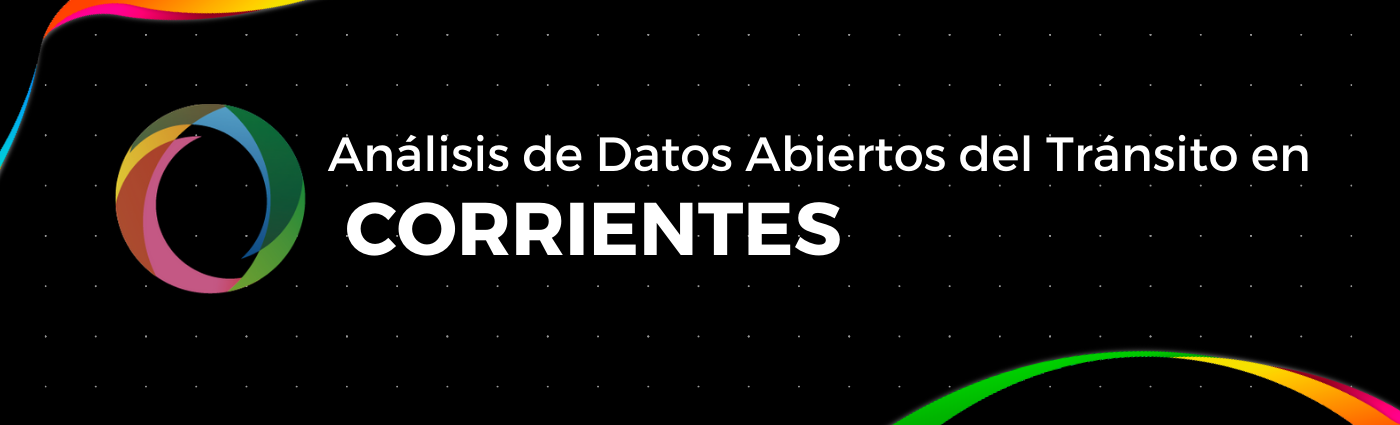

### En relación a la presentación de la plataforma de Datos Abiertos de la Municipalidad de Corrientes, decidí realizar un análisis exploratorio de los datos allí contenidos.  En este caso, utilicé la información del tránsito, específicamente, infracciones a particulares, no particulares y retiros de vehículos de la vía pública de la Ciudad de Corrientes Capital durante los años 2019 y 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
infracciones19 = pd.read_csv("D:/Desktop/Datos Abiertos Corrientes/actas_infracciones_2019.csv", sep=";",encoding="latin-1")
infracciones20 = pd.read_csv("D:/Desktop/Datos Abiertos Corrientes/infracciones.csv", sep=";",encoding="latin-1")
vehiculos19 = pd.read_csv("D:/Desktop/Datos Abiertos Corrientes/actas_vehiculos_np_2019.csv", sep=";",encoding="latin-1")
vehiculos20 = pd.read_csv("D:/Desktop/Datos Abiertos Corrientes/actas-vehiculos.csv", sep=";",encoding="latin-1")
retiros19 = pd.read_csv("D:/Desktop/Datos Abiertos Corrientes/retiro_via_publica_2019.csv", sep=";",encoding="latin-1")
retiros20 = pd.read_csv("D:/Desktop/Datos Abiertos Corrientes/retiro-via-publica-infraccion.csv", sep=";",encoding="latin-1")

In [3]:
infracciones19.drop(infracciones19.columns[6], axis=1, inplace=True)
infracciones19.dropna(inplace=True)
infracciones20.dropna(inplace=True)
vehiculos19.drop(vehiculos19.columns[5], axis=1, inplace=True)
vehiculos20.drop(vehiculos20.columns[6], axis=1, inplace=True)
retiros19.drop(retiros19.columns[6], axis=1, inplace=True)
retiros19.dropna(inplace=True)
retiros20.drop(retiros20.columns[6], axis=1, inplace=True)

infracciones19["tipo_infraccion"] = infracciones19["tipo_infraccion"].str.replace(
    'Fumiganción','Fumigación').str.replace(
    'Circular sin cinturon de seguridad','Circular sin cinturón de seguridad').str.replace(
    'Falta de documentacion','Falta de documentación').str.replace(
    "Falta de habilitacion","Falta de habilitación").str.replace(
    'Fumigacion','Fumigación')
retiros20["tipo_infraccion"] = retiros20["tipo_infraccion"].replace("Sin habilitacion", "Falta de habilitacion")

## Infracciones a Particulares

### ¿Cuántas infracciones a particulares se elaboraron durante 2019 y 2020?

In [4]:
print("La cantidad de Infracciones de Tránsito de Particulares para el año 2019 fue: " + str(int(infracciones19.cantidad.sum())))
print("La cantidad de Infracciones de Tránsito de Particulares para el año 2020 fue: " + str(int(infracciones20.cantidad.sum())))

La cantidad de Infracciones de Tránsito de Particulares para el año 2019 fue: 6727
La cantidad de Infracciones de Tránsito de Particulares para el año 2020 fue: 2406


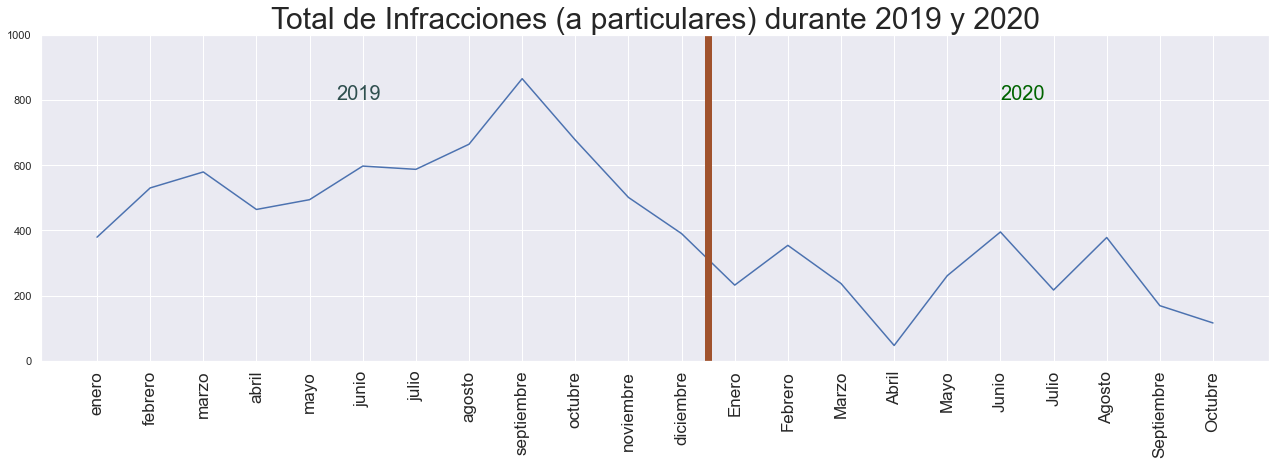

In [59]:
infracciones_mes_19 = pd.DataFrame(infracciones19.groupby(["mes"], sort=False).cantidad.sum())
infracciones_mes_19 = infracciones_mes_19.reset_index()

infracciones_mes_20 = pd.DataFrame(infracciones20.groupby(["mes"], sort=False).cantidad.sum())
infracciones_mes_20 = infracciones_mes_20.reset_index()

sns.set(rc={'figure.figsize':(22,6)})
result = infracciones_mes_19.append(infracciones_mes_20)
plot = sns.lineplot(data = result, x= "mes", y="cantidad", sort = False)
plot.set(ylim=(0, 1000))
plt.axvline(11.5, 0,900, color = "sienna", linewidth=7)
plt.text(4.5,800,'2019', size=20, color="darkslategrey")
plt.text(17,800,'2020', size=20, color="darkgreen")
plot.axes.set_title("Total de Infracciones (a particulares) durante 2019 y 2020",fontsize=30)
plot.set(ylabel=None)
plot.set(xlabel=None)
plt.xticks(fontsize=17, rotation=90)
plt.show()

#### Podemos observar que la cantidad de infracciones es mucho menor este año, lo que no soprende demasiado dado que la pandemia ha tenido un gran efecto en la movilidad y el tránsito.
<br>
<br>

### ¿Cuáles son las mayores razones por las que se elaboran infracciones en Corrientes?

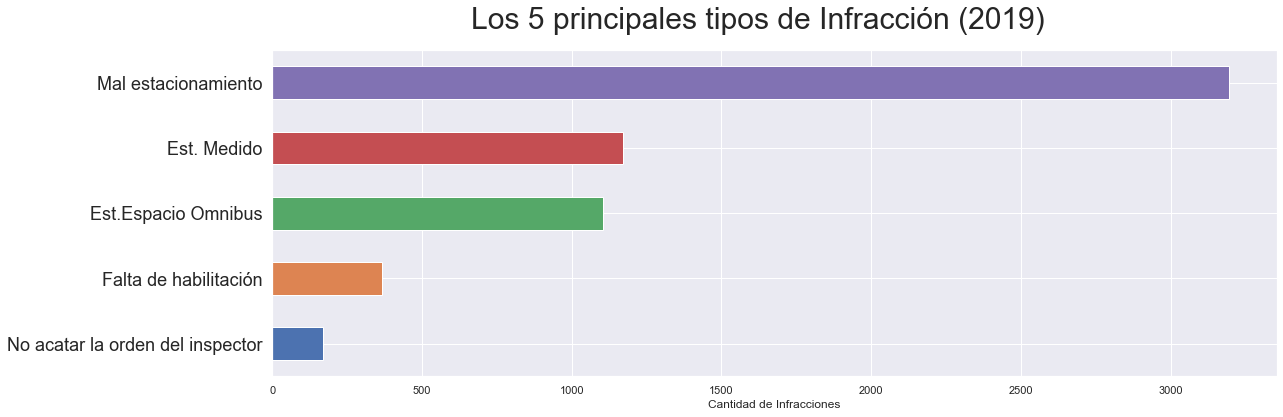

In [6]:
fig = plt.figure(figsize=(18,6))
result = infracciones19.groupby("tipo_infraccion").cantidad.sum().sort_values(ascending=False).head()
result.sort_values(ascending=True).plot(kind="barh")
plt.suptitle("Los 5 principales tipos de Infracción (2019)", size= 30)
plt.xlabel("Cantidad de Infracciones")
plt.yticks(fontsize=18)
plt.ylabel("")
plt.show()

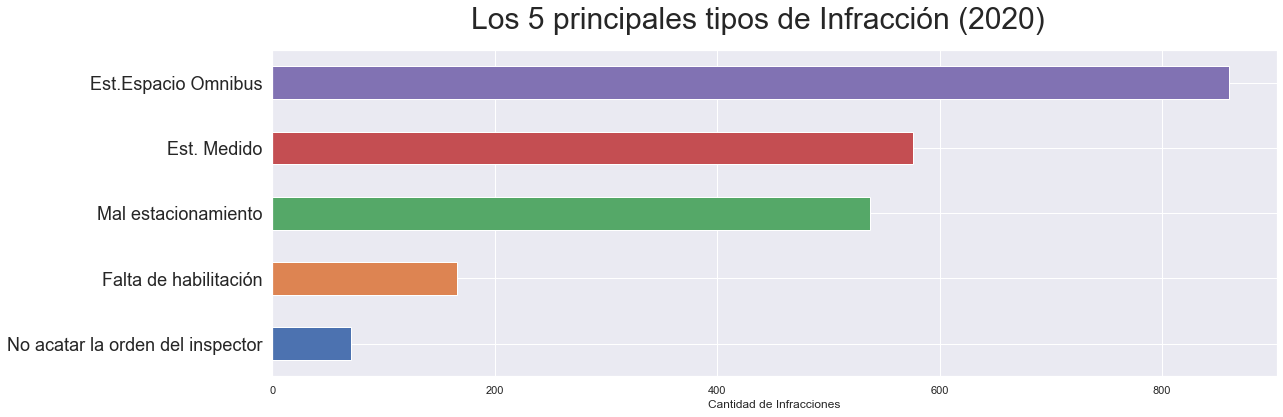

In [7]:
fig = plt.figure(figsize=(18,6))
result = infracciones20.groupby("tipo_infraccion").cantidad.sum().sort_values(ascending=False).head()
result.sort_values(ascending=True).plot(kind="barh")
plt.suptitle("Los 5 principales tipos de Infracción (2020)", size= 30)
plt.xlabel("Cantidad de Infracciones")
plt.ylabel("")
plt.ylim=(0, 3000)
plt.yticks(fontsize=18)
plt.show()

#### Tanto en el 2019 como en el presente año, las principales razones de elaboración de acta de infracción fueron estacionar en un lugar indebido. ¿Sería posible disminuir esto con una mejor señalización de los lugares habilitados para estacionamiento?
<br>
_______________________________________________________________________________________________________________________________

#### Estimaciones: el costo de las multas se miden en UF (unidades fijas, representadas por el costo actual del combustible de mayor octanaje). 
#### Sin información específica de la Ciudad de Corrientes pero utilizando la de otras provincias, se estima un valor promedio de 100 UF por cada infracción de estacionamiento en lugar indebido. Si redondeamos el precio de cada UF a 70 pesos al día de la fecha (12/2020), sólo por este tipo de infracción, los ciudadanos de Corrientes han sido multados por 382760 pesos durante el 2019 y 138110 pesos durante el 2020.
<br>
<br>
<br>
<br>

### ¿Cuantas infracciones se realizaron durante el 2019 según el nivel de "gravedad"?

In [8]:
infracciones19.groupby("gravedad_infraccion").cantidad.sum()

gravedad_infraccion
Grave        6670.0
Gravisima      38.0
Leve           19.0
Name: cantidad, dtype: float64

### ¿Cuáles son las infracciones "leves" y "gravisimas"?

In [9]:
print("Infracciones leves:")
for i in range (0, infracciones19[infracciones19["gravedad_infraccion"]=="Leve"].tipo_infraccion.nunique()):
    print(infracciones19[infracciones19["gravedad_infraccion"]=="Leve"].tipo_infraccion.unique()[i])

Infracciones leves:
Normas asc y desc pasajeros
falta de matafuegos
Fumigación
Falta de patente


In [10]:
print("Infracciones Gravisimas:")
for i in range (0, infracciones19[infracciones19["gravedad_infraccion"]=="Gravisima"].tipo_infraccion.nunique()):
    print(infracciones19[infracciones19["gravedad_infraccion"]=="Gravisima"].tipo_infraccion.unique()[i])

Infracciones Gravisimas:
Violar luz roja
Ebriedad
agredir al agente en cumplimiento de sus funciones


## Infracciones a No Particulares

### ¿Cuántas infracciones a no particulares se elaboraron durante 2019 y 2020?

In [11]:
print("La cantidad de Infracciones de Tránsito de No Particulares para el año 2019 fue: " + str(vehiculos19.cantidad.sum()))
print("La cantidad de Infracciones de Tránsito de No Particulares para el año 2020 fue: " + str(vehiculos20.cantidad.sum()))

La cantidad de Infracciones de Tránsito de No Particulares para el año 2019 fue: 6153
La cantidad de Infracciones de Tránsito de No Particulares para el año 2020 fue: 1869


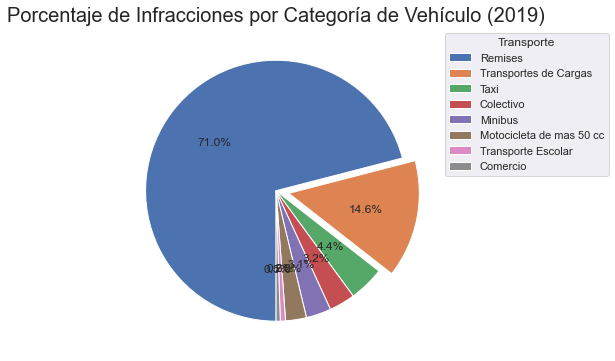

In [12]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0)
vehiculos19[vehiculos19["tipo_transporte"] != "Particular"].groupby("tipo_transporte").cantidad.sum().sort_values(ascending=False).plot(kind="pie", explode= explode, autopct='%1.1f%%', labeldistance = None,startangle=270 ,counterclock=False)
plt.legend(title="Transporte",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Porcentaje de Infracciones por Categoría de Vehículo (2019)", size=20)
plt.ylabel("")
plt.show()

In [13]:
print(vehiculos19[vehiculos19["tipo_transporte"] != "Particular"].groupby("tipo_transporte").cantidad.sum().sort_values(ascending=False))

tipo_transporte
Remises                     550
Transportes de Cargas       113
Taxi                         34
Colectivo                    25
Minibus                      24
Motocicleta de mas 50 cc     20
Transporte Escolar            5
Comercio                      4
Name: cantidad, dtype: int64


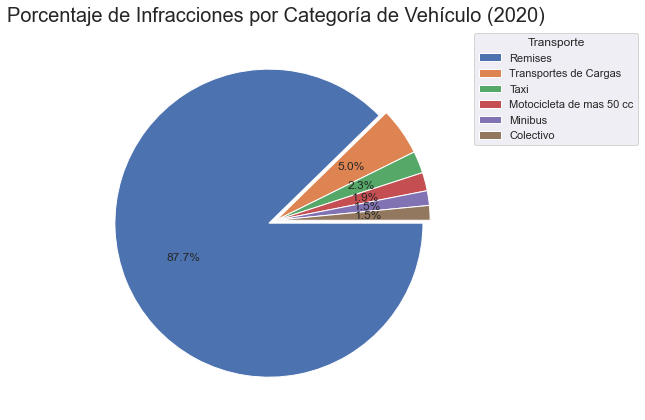

In [14]:
explode = (0.05, 0, 0, 0, 0, 0)
vehiculos20[vehiculos20["tipo_transporte"] != "Particular"].groupby("tipo_transporte").cantidad.sum().sort_values(ascending=False).plot(kind="pie", explode= explode, autopct='%1.1f%%', labeldistance = None, startangle=0, counterclock=False)
plt.legend(title="Transporte",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Porcentaje de Infracciones por Categoría de Vehículo (2020)", size=20)
plt.ylabel("")
plt.tight_layout()
plt.show()

In [15]:
print(vehiculos20[vehiculos20["tipo_transporte"] != "Particular"].groupby("tipo_transporte").cantidad.sum().sort_values(ascending=False))

tipo_transporte
Remises                     228
Transportes de Cargas        13
Taxi                          6
Motocicleta de mas 50 cc      5
Minibus                       4
Colectivo                     4
Name: cantidad, dtype: int64


#### En ambos años, los mayores infractores en vehículos no particulares son los remises. Sin embargo, este dato no sorprende, debido a que la cantidad de remises es mucho mayor a cualquier otro tipo de vehículo con fines comerciales. Se debería realizar un análisis en base a las cantidades relativas, pero no tenemos esos datos.

#### Sin embargo, en la base de datos del año 2020 tenemos información acerca de la razón social de los infractores en vehículos no comerciales, lo cuál nos permite, por ejemplo, respondernos: ¿cuál es la empresa de remises con mayor cantidad de remises que infringen las normas?

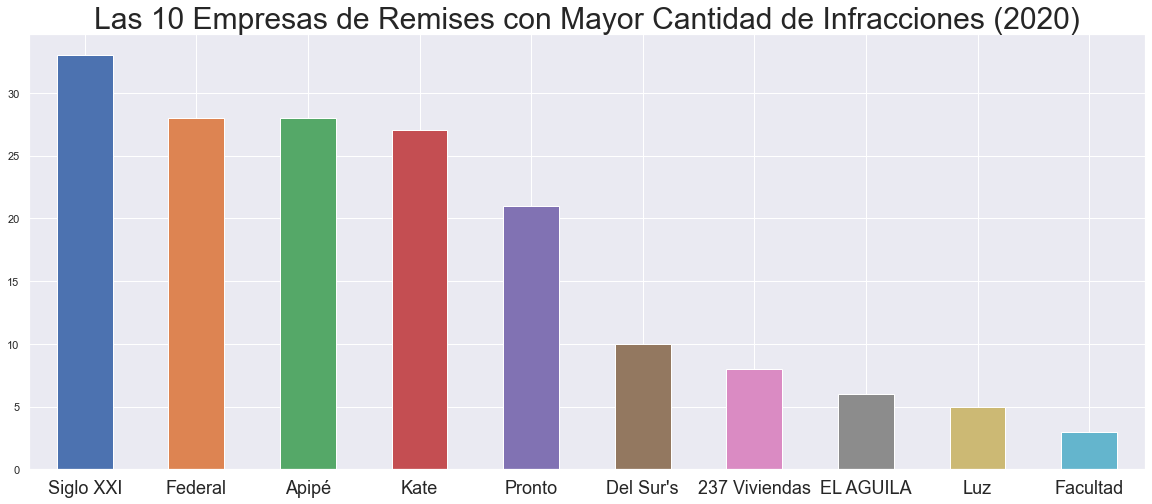

In [16]:
plt.figure(figsize=(20,8))
vehiculos20[(vehiculos20["razon_social"]!="Sin razon social") & (vehiculos20["tipo_transporte"] == "Remises")].groupby("razon_social").cantidad.sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.xticks(rotation="horizontal")
plt.xlabel("")
plt.xticks(fontsize=18)
plt.title("Las 10 Empresas de Remises con Mayor Cantidad de Infracciones (2020)", size=30)
plt.show()

#### También aquí se debe ser cuidadoso ya que es probable que las empresas con mayores infracciones en términos absolutos también sean las que mayor cantidad de remises circulando tengan. Para una comparación justa se debería hacer un análisis con las cantidades relativas.

## Retiros de Vehículos

### ¿Cuántos retiros de vehículos se realizaron durante 2019 y 2020?

In [17]:
print("La cantidad de Retiros de Vehículos en la Vía Pública en el 2019 fue: " + str(int(retiros19.cantidad.sum())))
print("La cantidad de Retiros de Vehículos en la Vía Pública en el 2020 fue: " + str(retiros20.cantidad.sum()))

La cantidad de Retiros de Vehículos en la Vía Pública en el 2019 fue: 340
La cantidad de Retiros de Vehículos en la Vía Pública en el 2020 fue: 256


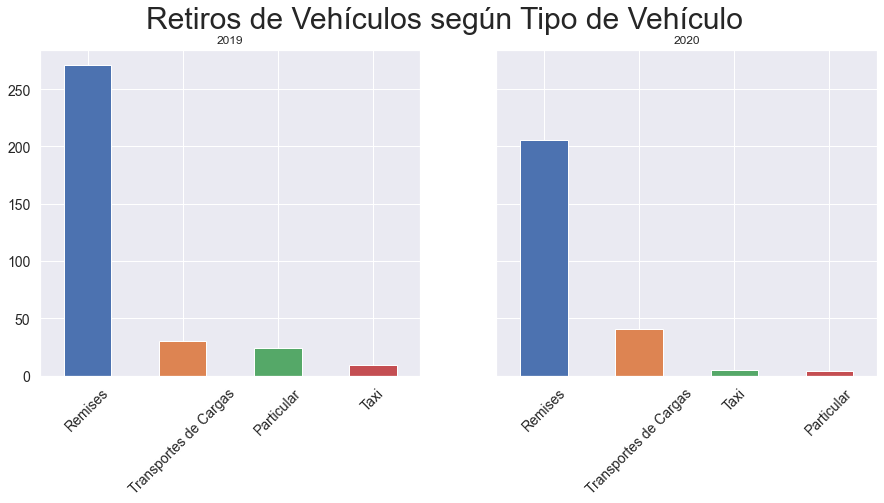

In [18]:
fig, axes = plt.subplots(figsize=(15,6),nrows=1, ncols=2, sharey=True)
retiros19.groupby("tipo_vehículo").cantidad.sum().sort_values(ascending=False).head(4).plot(kind="bar", ax=axes[0],rot=45)
retiros20.groupby("tipo_vehiculo").cantidad.sum().sort_values(ascending=False).plot(kind="bar", ax=axes[1],rot=45)
plt.suptitle("Retiros de Vehículos según Tipo de Vehículo", size=30)
axes[0].title.set_text('2019')
axes[1].title.set_text('2020')
axes[0].set(xlabel="")
axes[1].set(xlabel="")
axes[0].tick_params(axis='both', labelsize=14)
axes[1].tick_params(axis='both', labelsize=14)
plt.show()

#### Al comparar la cantidad de secuestros de vehículos por incumplimiento de normas del año 2019 y 2020, podemos ver que la cantidad de secuestros es similar para remises en ambos años y aumenta en el presente año para transporte de cargas. Teniendo en cuenta que durante el 2020 la movilización vehicular disminuyó enormemente debido a la pandemia, estos números llaman un poco la atención.

#### Una hipótesis puede ser que, al haber menos vehículos particulares circulando, la probabilidad de que un vehículo comercial (remises y camiones) fuesen controlados por autoridades de tránsito era mucho más alta.


### ¿Hay diferencias en las razones de secuestro de vehículos entre 2019 y 2020?

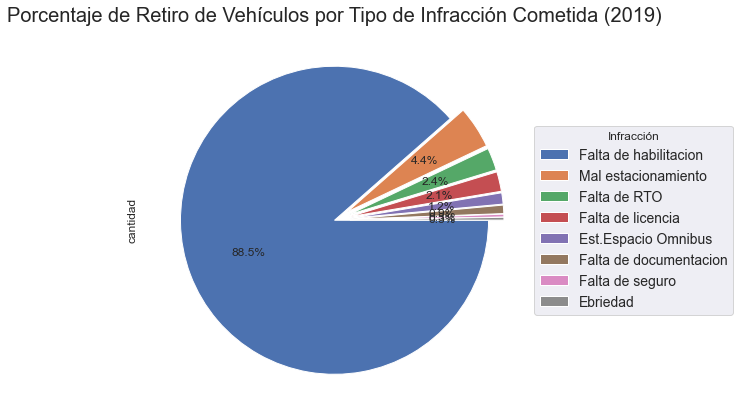

In [56]:
explode = (0,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

retiros19.groupby("tipo_infraccion").cantidad.sum().sort_values(ascending=False).plot(kind="pie",explode= explode, autopct='%1.1f%%', labeldistance = None, startangle=0, counterclock=False)
plt.legend(title="Infracción",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=14)
plt.title("Porcentaje de Retiro de Vehículos por Tipo de Infracción Cometida (2019)", size=20)
plt.ylabel=("")
plt.tight_layout()
plt.show()

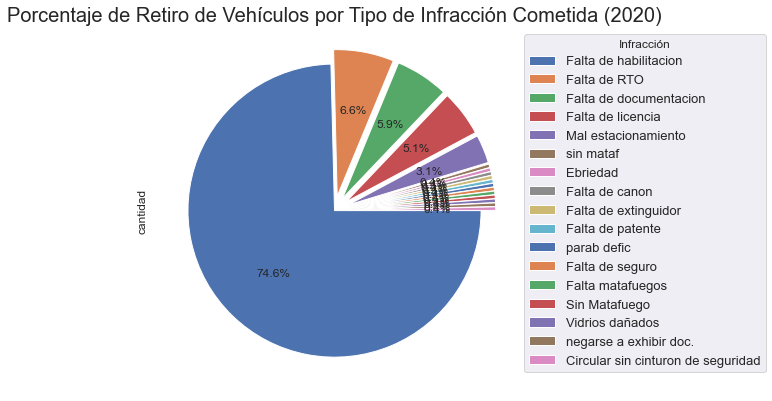

In [54]:
explode =  (0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
retiros20.groupby("tipo_infraccion").cantidad.sum().sort_values(ascending=False).plot(kind="pie",explode= explode, autopct='%1.1f%%', labeldistance = None, startangle=0, counterclock=False)
plt.legend(title="Infracción",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=13)
plt.title("Porcentaje de Retiro de Vehículos por Tipo de Infracción Cometida (2020)", size=20)
plt.ylabel=("")
plt.tight_layout()
plt.show()

#### Se puede ver que en el presente año, las causas para el secuestro de vehículos han sido mucho más variadas. Entre las múltiples causas, se pueden ver, por ejemplo, la ausencia de matafuegos, lo cuál también llama la atención, debido a que en actas es considerada una infracción "leve".